In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as sp

In [ ]:
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv(filepath_or_buffer = 'avocado.csv')

In [ ]:
print('Data Shape:', data.shape)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

Data Shape: (18249, 14)
There are 18249 rows and 14 columns


In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

#### Check for Null & Duplicates

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

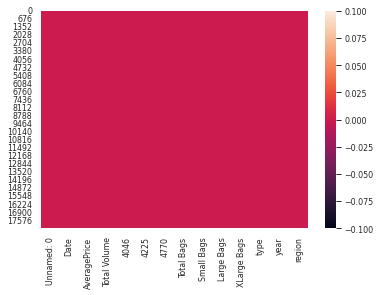

In [ ]:
sns.heatmap(data.isnull());

In [ ]:
print('total number of duplicate values : ',sum(data.duplicated()))

total number of duplicate values :  0


In [ ]:
data=data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
datam=pd.read_csv(filepath_or_buffer = 'avocado.csv')

## Detect any outliers

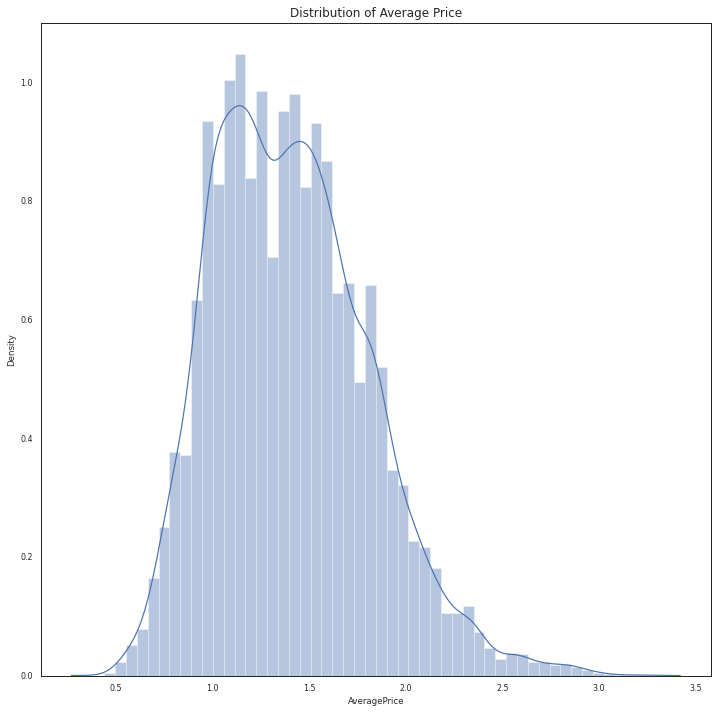

In [ ]:
sns.set_style("white")

plt.figure(figsize=(12,12))
sns.distplot(data.AveragePrice)
plt.title("Distribution of Average Price",fontsize=12);

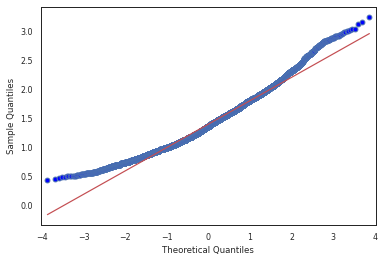

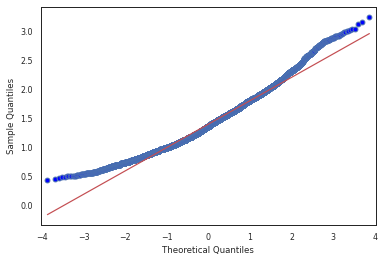

In [ ]:
import statsmodels.api as sm
sm.qqplot(data.AveragePrice,line="s")

In [ ]:
mean = data.AveragePrice.mean()
std = data.AveragePrice.std()
lower, upper = mean-std*2,mean+std*2
print("Lower Limit : {} Upper Limit : {}".format(lower,upper))

Lower Limit : 0.6006252987847768 Upper Limit : 2.2113315207669793


In [ ]:
outliers = [x for x in data.AveragePrice if x < lower or x > upper]
print("Outlier values : {}".format(outliers))

Outlier values : [0.49, 0.53, 0.56, 0.6, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.6, 0.53, 0.51, 0.57, 0.57, 0.6, 0.6, 0.56, 0.58, 0.6, 0.6, 0.54, 0.58, 0.59, 0.58, 0.58, 0.58, 0.56, 0.58, 0.6, 0.58, 0.55, 0.57, 0.54, 0.56, 0.54, 0.56, 0.51, 0.57, 0.55, 0.59, 0.56, 2.22, 0.6, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.53, 0.6, 0.6, 0.6, 0.57, 0.54, 0.46, 0.58, 0.54, 0.6, 0.52, 0.56, 0.58, 0.56, 0.59, 0.58, 0.59, 0.59, 2.28, 2.35, 2.29, 2.24, 2.29, 2.29, 2.24, 2.32, 2.24, 2.34, 2.33, 2.31, 2.23, 2.27, 2.3, 2.41, 2.31, 2.36, 2.37, 2.33, 2.31, 2.39, 2.31, 2.42, 2.39, 2.45, 2.38, 2.4, 2.31, 2.4, 2.25, 2.34, 2.24, 2.36, 2.3, 2.31, 2.24, 2.27, 2.27, 2.26, 2.38, 2.37, 2.35, 2.28, 2.32, 2.26, 2.31, 2.22, 2.31, 2.4, 2.34, 2.25, 2.22, 2.24, 2.28, 2.3, 2.24, 2.34, 2.31, 2.24, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.36, 2.23, 2.25, 2.29, 2.28, 2.24, 2.37, 2.49, 2.58, 2.3, 2.3, 2.25, 2.24, 2.23, 2.26, 2.28, 2.22, 2.41, 2.36, 2.54, 2.42, 2.67, 2.3, 2

In [ ]:
df_exclude = data[(data.AveragePrice < upper) | (data.AveragePrice > lower)]

In [ ]:
df_exclude.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df_exclude.shape

(18249, 13)

In [ ]:
data.shape

(18249, 13)

In [ ]:
quantile = np.quantile(data.AveragePrice,[0.25,0.5,0.75,1])
IQR = quantile[2] - quantile[0]
upper = 1.5*IQR + quantile[2]
lower = quantile[0] - 1.5*IQR

print("Upper bound : {} Lower bound : {}".format(upper,lower))

outlier = [x for x in data.AveragePrice if x < lower or x>upper]
print("\nOutlier values :\n {}".format(outliers))

Upper bound : 2.4999999999999996 Lower bound : 0.26000000000000034

Outlier values :
 [0.49, 0.53, 0.56, 0.6, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.6, 0.53, 0.51, 0.57, 0.57, 0.6, 0.6, 0.56, 0.58, 0.6, 0.6, 0.54, 0.58, 0.59, 0.58, 0.58, 0.58, 0.56, 0.58, 0.6, 0.58, 0.55, 0.57, 0.54, 0.56, 0.54, 0.56, 0.51, 0.57, 0.55, 0.59, 0.56, 2.22, 0.6, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.53, 0.6, 0.6, 0.6, 0.57, 0.54, 0.46, 0.58, 0.54, 0.6, 0.52, 0.56, 0.58, 0.56, 0.59, 0.58, 0.59, 0.59, 2.28, 2.35, 2.29, 2.24, 2.29, 2.29, 2.24, 2.32, 2.24, 2.34, 2.33, 2.31, 2.23, 2.27, 2.3, 2.41, 2.31, 2.36, 2.37, 2.33, 2.31, 2.39, 2.31, 2.42, 2.39, 2.45, 2.38, 2.4, 2.31, 2.4, 2.25, 2.34, 2.24, 2.36, 2.3, 2.31, 2.24, 2.27, 2.27, 2.26, 2.38, 2.37, 2.35, 2.28, 2.32, 2.26, 2.31, 2.22, 2.31, 2.4, 2.34, 2.25, 2.22, 2.24, 2.28, 2.3, 2.24, 2.34, 2.31, 2.24, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.36, 2.23, 2.25, 2.29, 2.28, 2.24, 2.37, 2.49, 2.58, 2.3, 2.3, 2.2

In [ ]:
df_exclude2 = data[(data.AveragePrice > lower) | (data.AveragePrice < upper)]
df_exclude2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Data Normalization

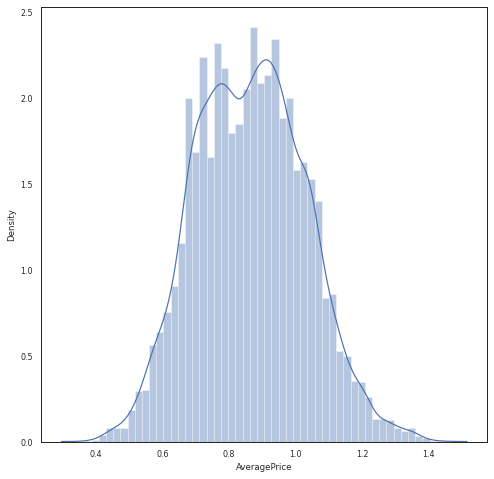

In [ ]:
log_data = np.log(data.AveragePrice+1)
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.distplot(log_data);

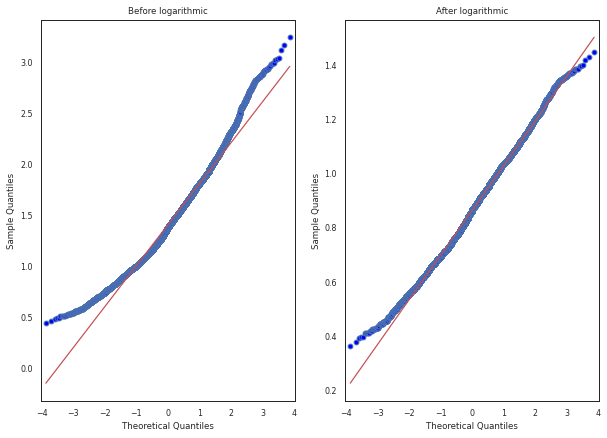

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,7))
sm.qqplot(data.AveragePrice,line="s",ax=ax[0])
ax[0].set_title("Before logarithmic")
sm.qqplot(log_data,line="s",ax=ax[1])
ax[1].set_title("After logarithmic");

### Region

In [ ]:
len(data.region.unique())

54

In [ ]:
data.groupby('region').size() 

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

### The average prices by regions

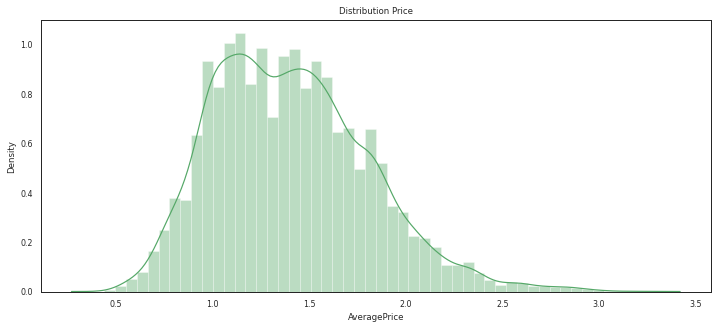

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(data["AveragePrice"], color = 'g')

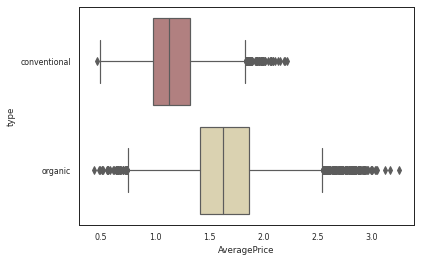

In [ ]:
sns.boxplot(y="type", x="AveragePrice", data=data, palette = 'pink');

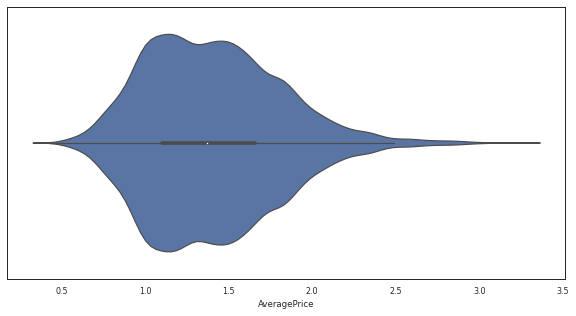

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(data.dropna(subset = ['AveragePrice']).AveragePrice);

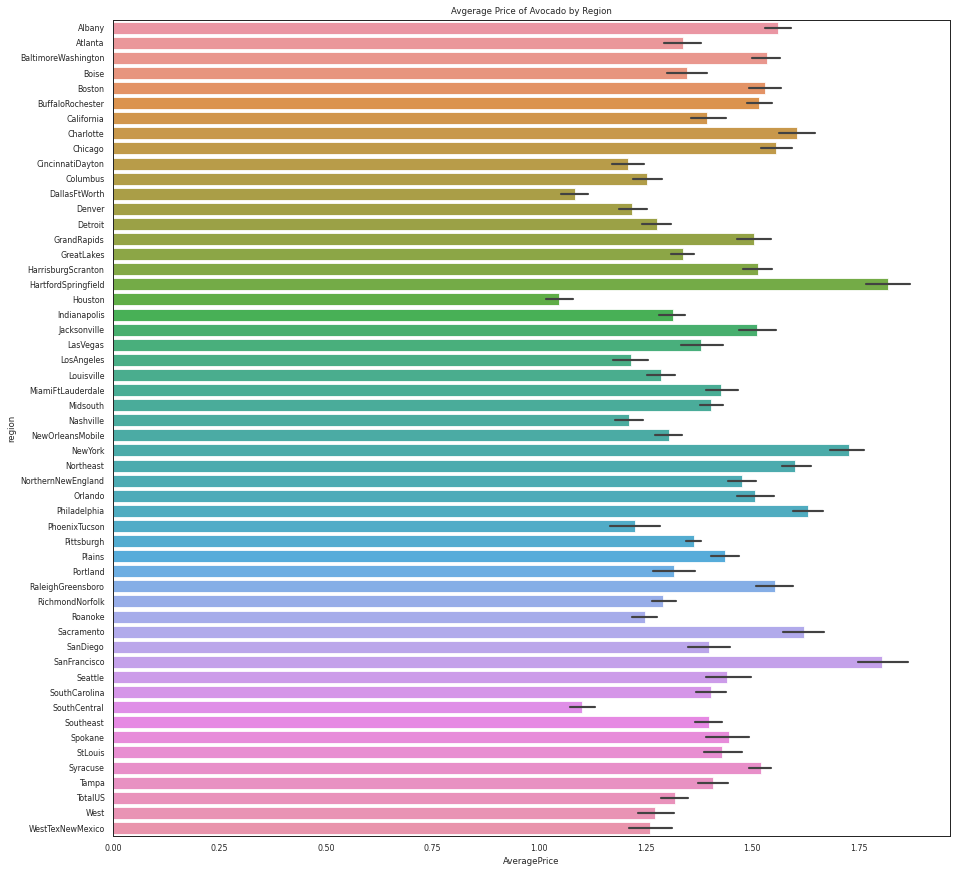

In [ ]:
plt.figure(figsize=(15,15))

plt.title("Avgerage Price of Avocado by Region")

sns.barplot(x="AveragePrice",y="region",data=data)

plt.show()

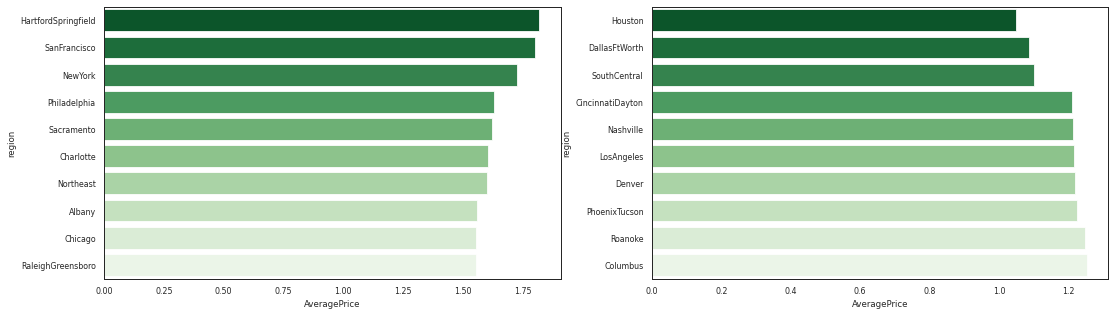

the most expensive datacados can be found in ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
the cheapest datacados can be found in ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = data.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = data, order=expensive.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = data, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('the most expensive datacados can be found in {} '.format(list(expensive.iloc[:5,0])))
print('the cheapest datacados can be found in {} '.format(list(cheap.iloc[:5,0])))

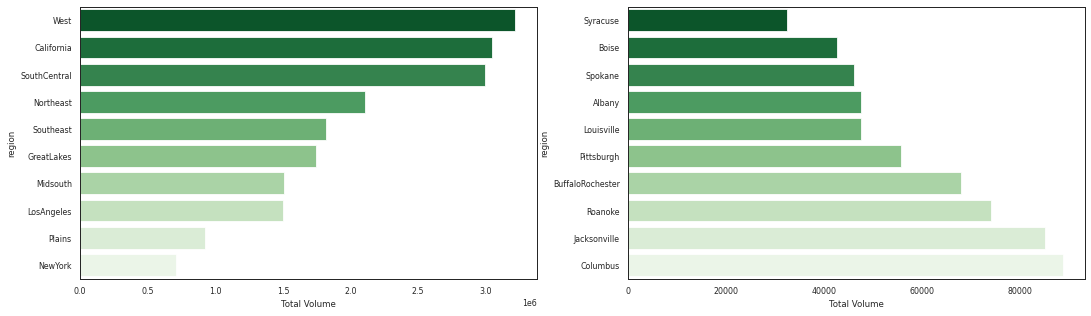

States with the the biggest demand are ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
States with the least demand are ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

dataStates = data[data['region'] !='TotalUS']

regionV = dataStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = dataStates, order=most.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = dataStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the biggest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the least demand are {} '.format(list(least.iloc[:5,0])))

### Dates & Seasonality check

In [ ]:
from datetime import datetime
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day of week'] = data['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
data[dates]

,year,month,day,day of week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


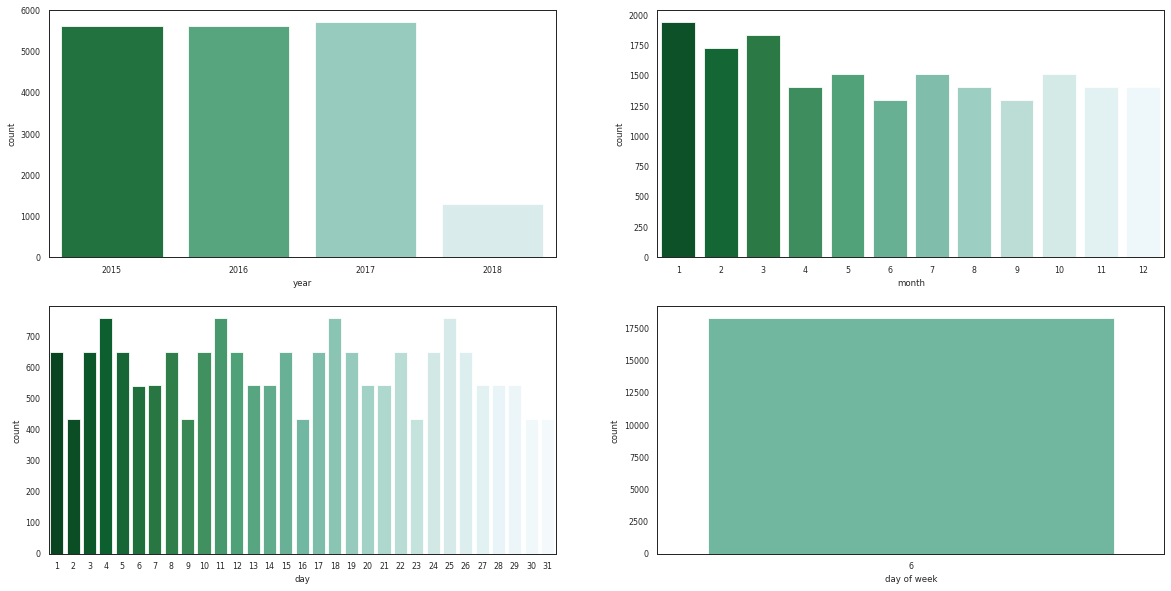

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.countplot('year', data=data, ax=ax[0,0], palette='BuGn_r')
sns.countplot('month', data=data, ax=ax[0,1], palette='BuGn_r')
sns.countplot('day', data=data, ax=ax[1,0], palette='BuGn_r')
sns.countplot('day of week', data=data, ax=ax[1,1], palette='BuGn')

plt.show()

In [ ]:
data.drop('day of week', axis=1, inplace=True)

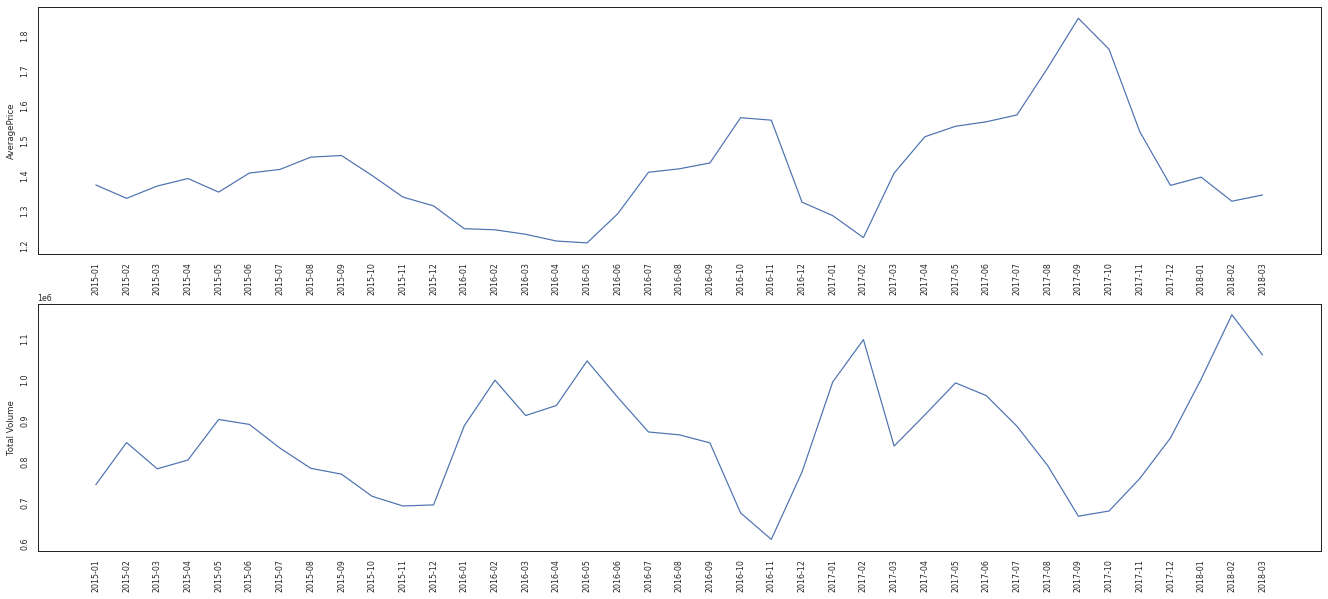

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(23,10))

data['year_month'] = data['Date'].dt.to_period('M')
grouped = data.groupby('year_month')[['AveragePrice', 'Total Volume']].mean()

ax[0].plot(grouped.index.astype(str), grouped['AveragePrice'])
ax[0].tick_params(labelrotation=90)
ax[0].set_ylabel('AveragePrice')


ax[1].plot(grouped.index.astype(str), grouped['Total Volume'])
ax[1].tick_params(labelrotation=90)
ax[1].set_ylabel('Total Volume')

plt.show()

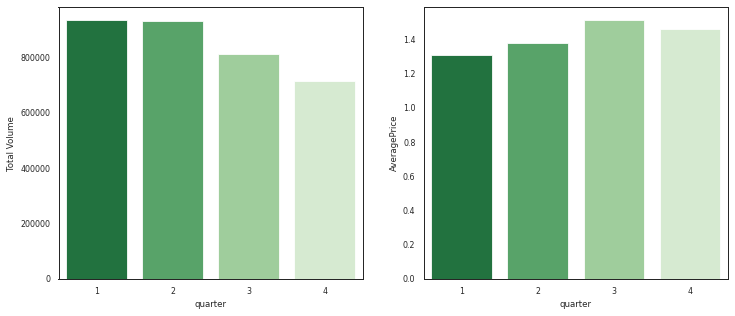

,Total Volume,AveragePrice
quarter,,
1,933371.788252,1.306605
2,928527.872254,1.375033
3,808062.047498,1.512913
4,710750.427752,1.458588


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

data['quarter'] = data['Date'].dt.quarter


sns.barplot(x='quarter', y='Total Volume', data=data, palette='Greens_r', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=data, palette='Greens_r', ci=None, ax=ax[1])


plt.show()

quarter = data.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,year_month,quarter
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015-12,4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015-12,4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015-12,4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,2015-12,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,2015-11,4


### Type

In [ ]:
print(len(data.type.unique()))

data.groupby('type').size()

2


type
conventional    9126
organic         9123
dtype: int64

### The average prices of avocados by types

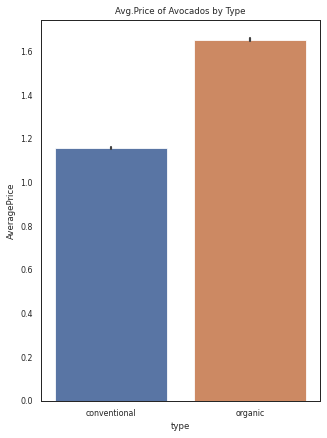

In [ ]:
plt.figure(figsize=(5,7))

plt.title("Avg.Price of Avocados by Type")

sns.barplot(x="type",y="AveragePrice",data= data)

plt.show()

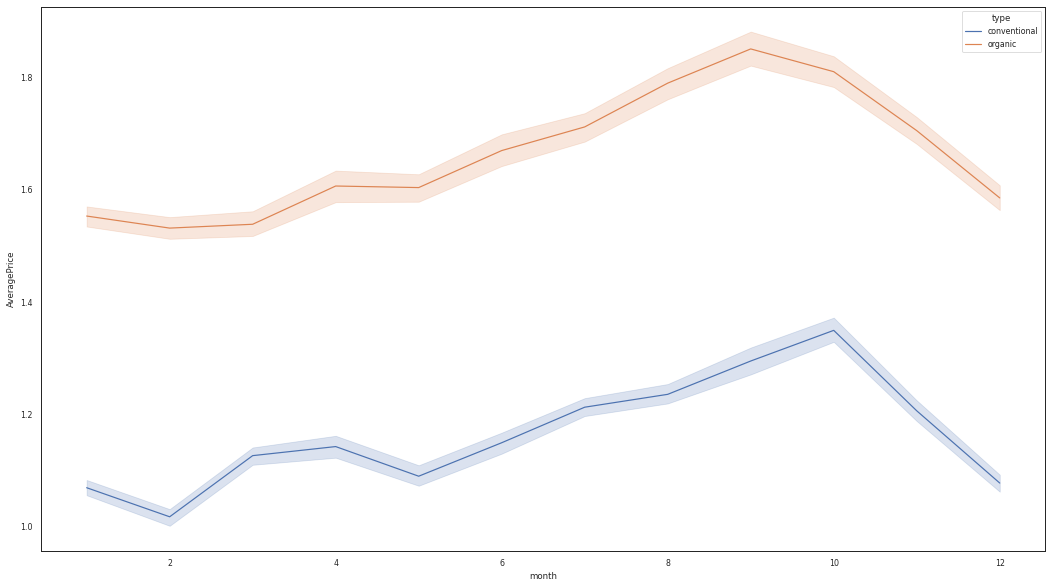

In [ ]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=data);


In [ ]:
data['month'].head()

0    12
1    12
2    12
3    12
4    11
Name: month, dtype: int64

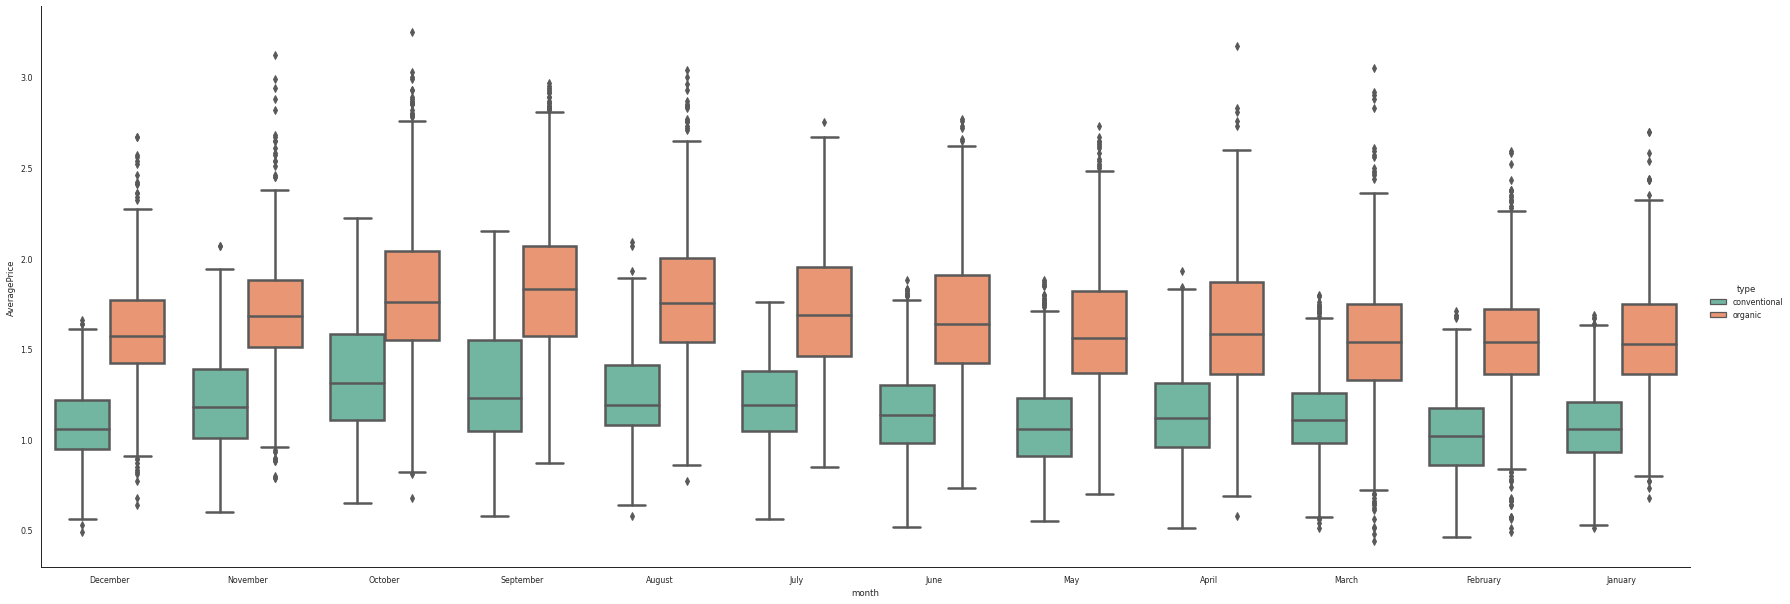

In [ ]:
data['month'] = data['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                                   6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
                                   11: 'November', 12: 'December'})
ax = sns.catplot(x="month", y="AveragePrice", hue="type", 
            kind="box", data=data, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2");

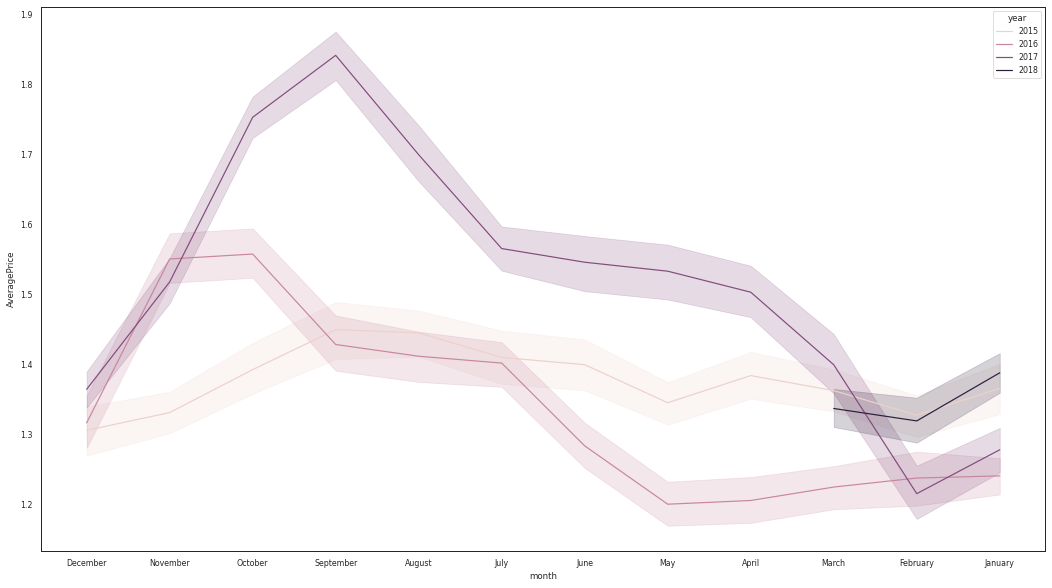

In [ ]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", hue='year',  data=data)
plt.show()

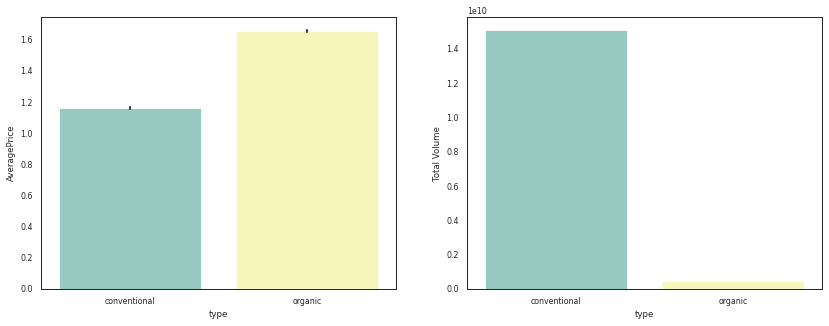

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x='type', y='AveragePrice', data=data, palette='Set3', ax=ax[0])
sns.barplot(x='type', y='Total Volume', data=data, palette='Set3', ax=ax[1], estimator=sum, ci=None)
plt.show()

display(data.groupby('type')['AveragePrice'].mean())
display(data.groupby('type')['Total Volume'].sum())

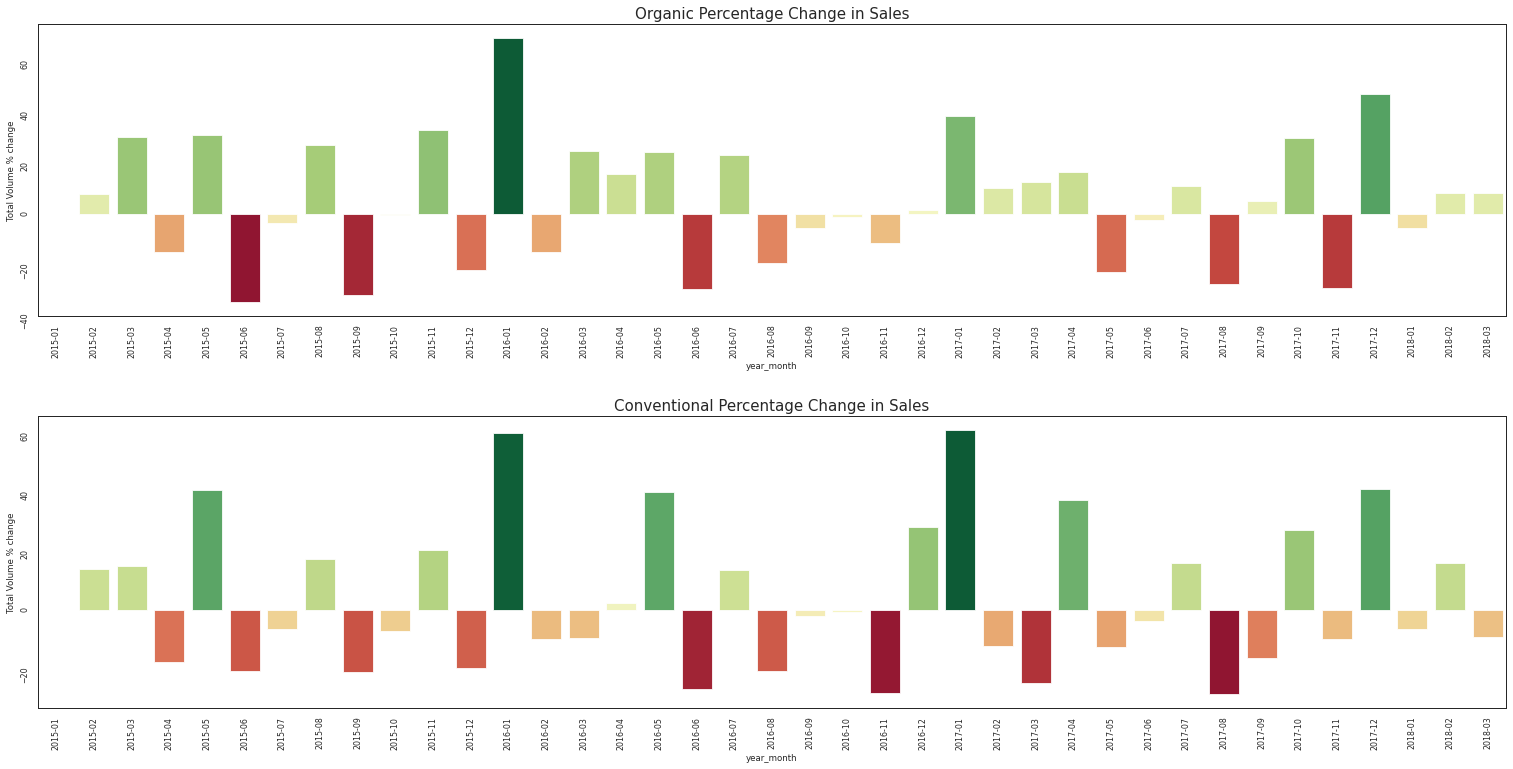

The sum of percentage change of Organic is: 200.48
The sum of percentage change of Conventional is: 137.02


In [ ]:
from matplotlib.colors import DivergingNorm
fig, ax = plt.subplots(2, 1, figsize=(23,12))
fig.tight_layout(pad=8)


group = data.groupby(['type', 'year_month'])['Total Volume'].sum()

organic = group['organic']
organic = pd.DataFrame(organic)
organic['Total Volume % change'] = np.round(organic['Total Volume'].pct_change() * 100, 2)

conventional = group['conventional']
conventional = pd.DataFrame(conventional)
conventional['Total Volume % change'] = np.round(conventional['Total Volume'].pct_change() * 100, 2)

norm = DivergingNorm(vmin=organic['Total Volume % change'].min(), vcenter=0, vmax=organic['Total Volume % change'].max())
colors = [plt.cm.RdYlGn(norm(c)) for c in organic['Total Volume % change']]
sns.barplot(x=organic.index, y=organic['Total Volume % change'], data=organic, ax=ax[0], palette=colors)

norm = DivergingNorm(vmin=conventional['Total Volume % change'].min(), vcenter=0, vmax=conventional['Total Volume % change'].max())
colors = [plt.cm.RdYlGn(norm(c)) for c in conventional['Total Volume % change']]
sns.barplot(x=conventional.index, y=conventional['Total Volume % change'], data=conventional, ax=ax[1], palette=colors)


ax[0].tick_params(labelrotation=90)
ax[0].set_title('Organic Percentage Change in Sales', fontsize=15)

ax[1].tick_params(labelrotation=90)
ax[1].set_title('Conventional Percentage Change in Sales', fontsize=15)

plt.show()

conventional['Total Volume % change'].mean()
print("The sum of percentage change of Organic is: {}".format(np.around(organic['Total Volume % change'].sum(), 2)))
print("The sum of percentage change of Conventional is: {}".format(np.around(conventional['Total Volume % change'].sum(), 2)))

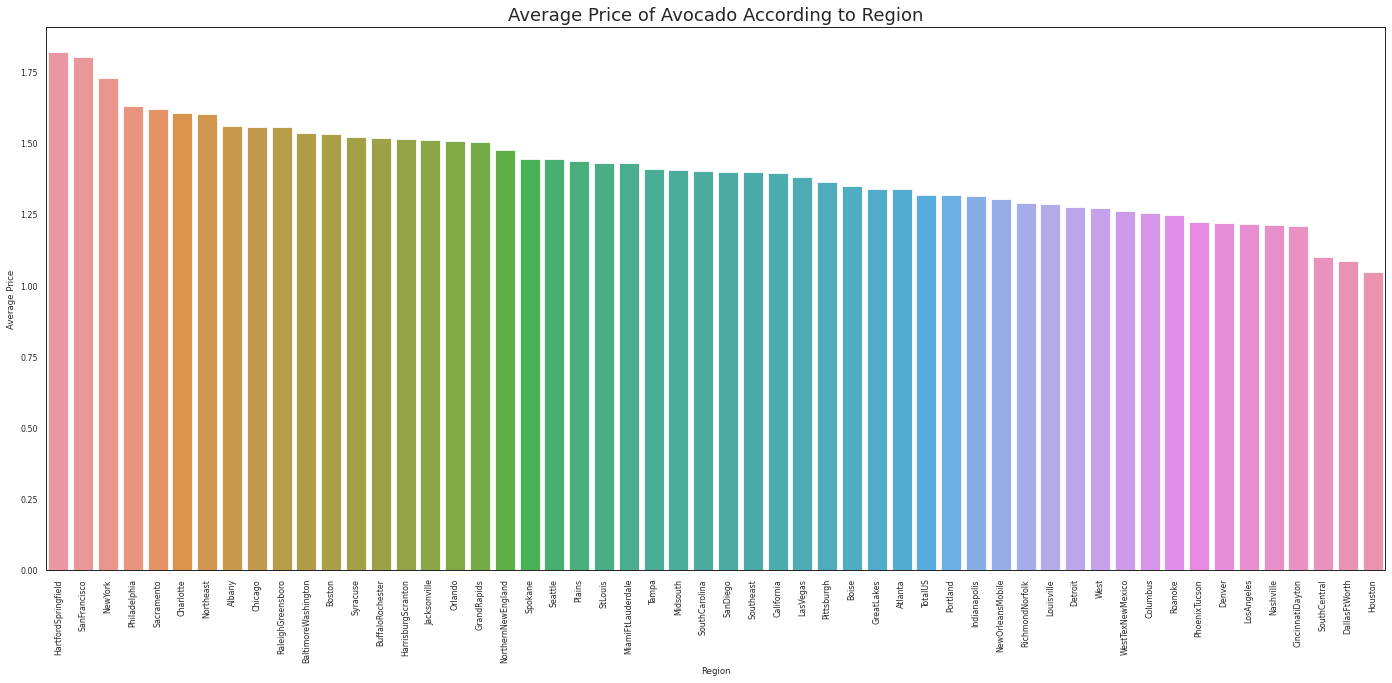

In [ ]:
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

data1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=data1.average_price.sort_values(ascending=False).index.values
sorted_data=data1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region',fontsize=18);

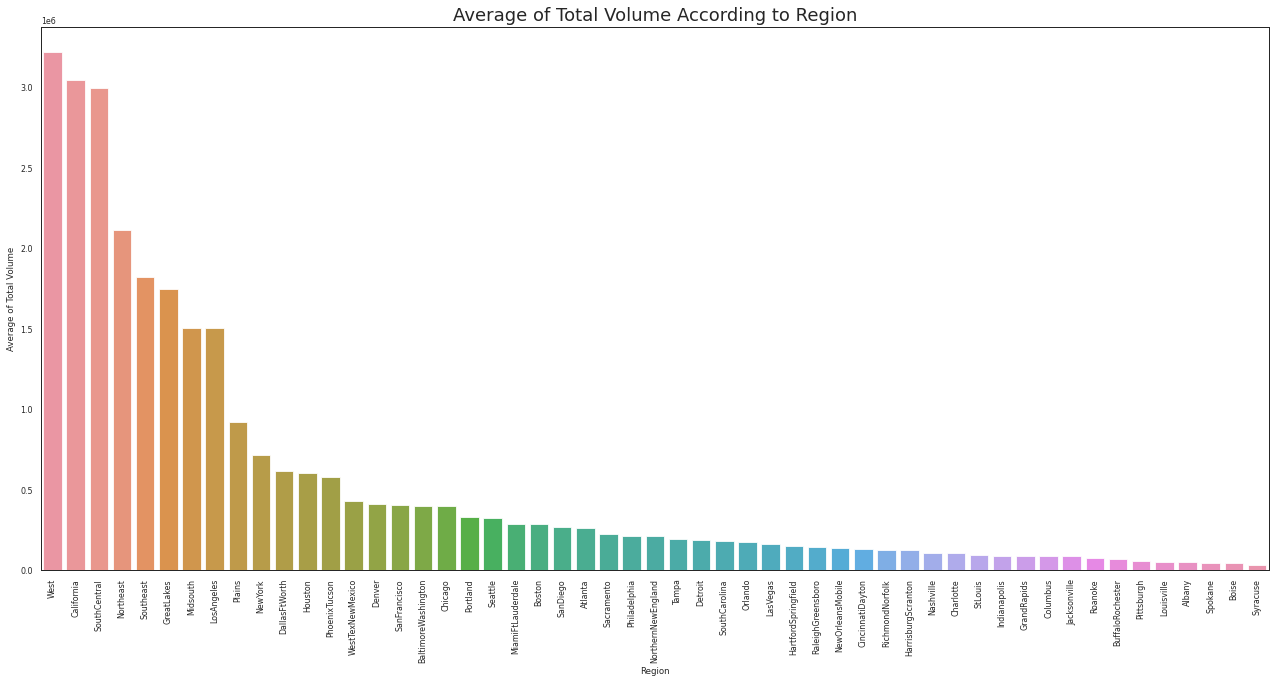

In [ ]:
filter1=data.region!='TotalUS'
data1=data[filter1]

region_list=list(data1.region.unique())
average_total_volume=[]

for i in region_list:
    x=data1[data1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
data3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=data3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=data3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region',fontsize=18);

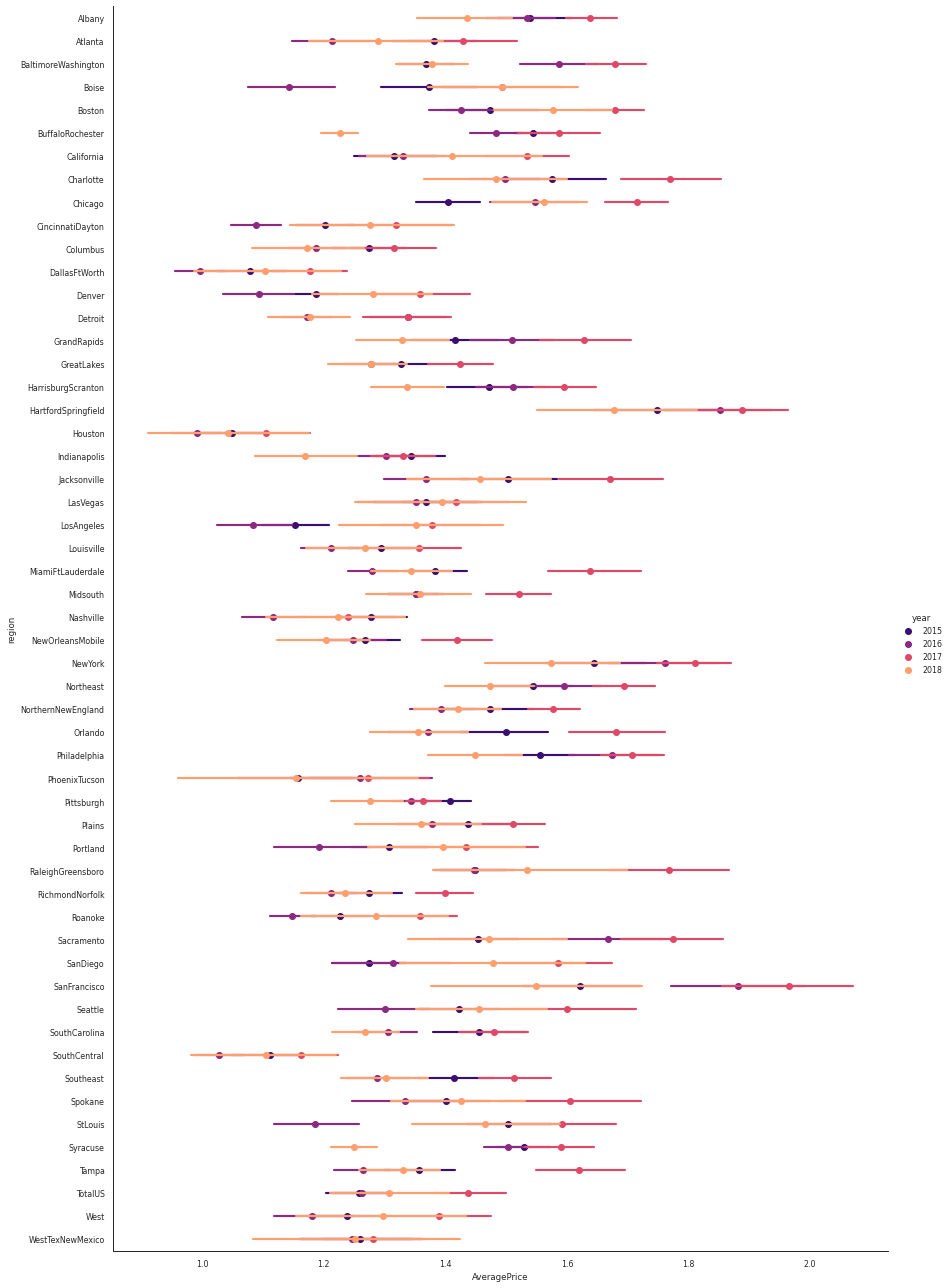

In [ ]:
g = sns.factorplot('AveragePrice','region',data=data,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='magma',
                   join=False,
              )

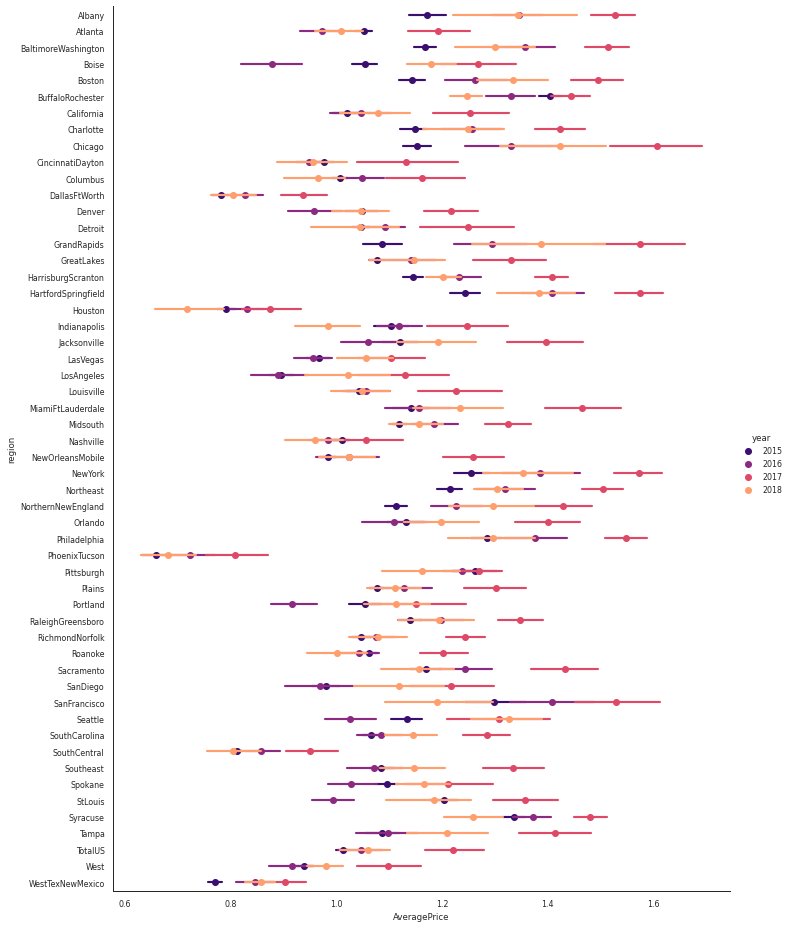

In [ ]:
mask = data['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

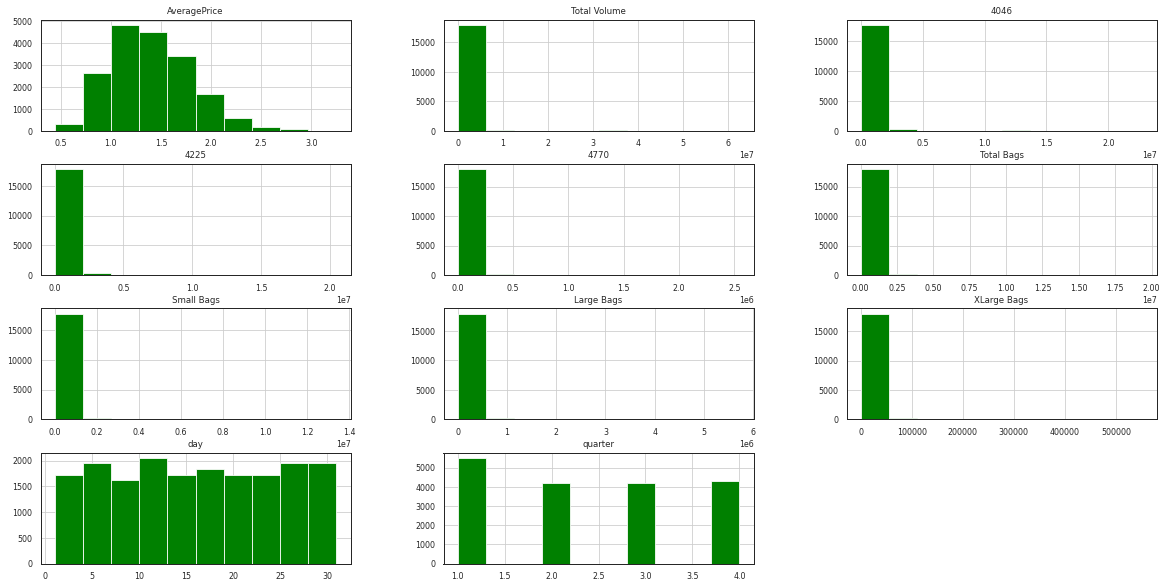

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,day,quarter
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,15.662612,2.402323
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,8.776281,1.147834
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,8.000000,1.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,16.000000,2.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,23.000000,3.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,31.000000,4.000000


In [ ]:
numbers = list(data.select_dtypes(['float64', 'int64']).keys())

numbers.remove('year')

data[numbers].hist(figsize=(20,10), color='green', edgecolor='white')

plt.show()

display(data[numbers].describe())

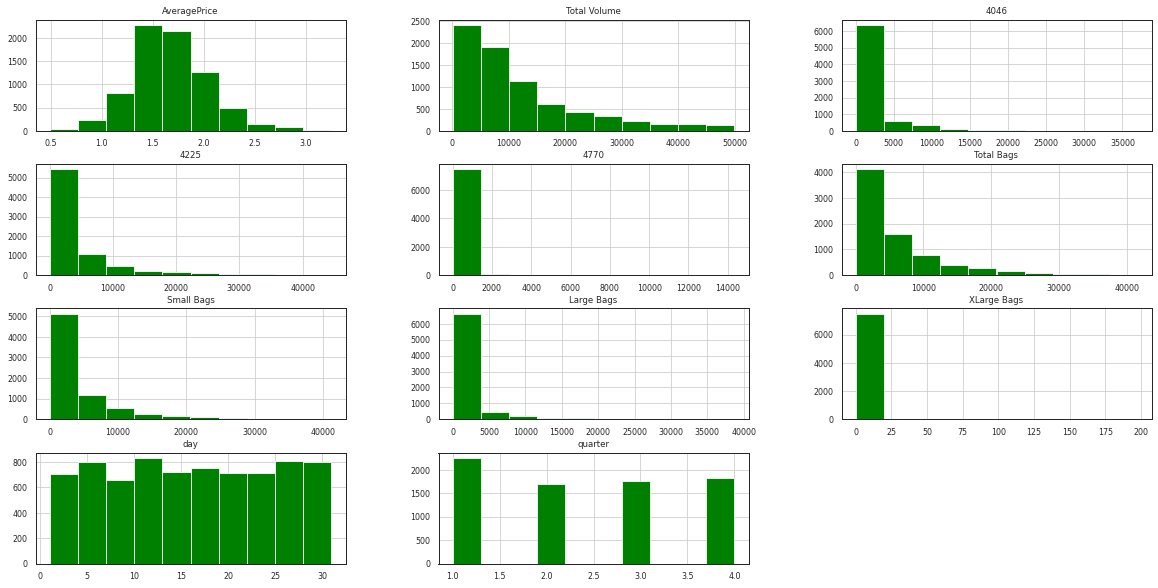

In [ ]:
data_o = data[data['Total Volume']<50000]
data_o[numbers].hist(figsize=(20,10), color='green', edgecolor='white')

plt.show()

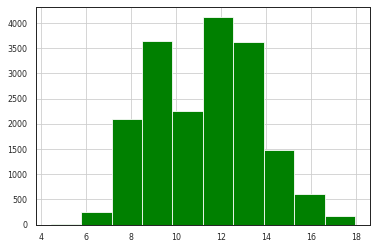

In [ ]:
TotalLog = np.log(data['Total Volume'] + 1)
TotalLog.hist(color='green', edgecolor='white');

### Correlation

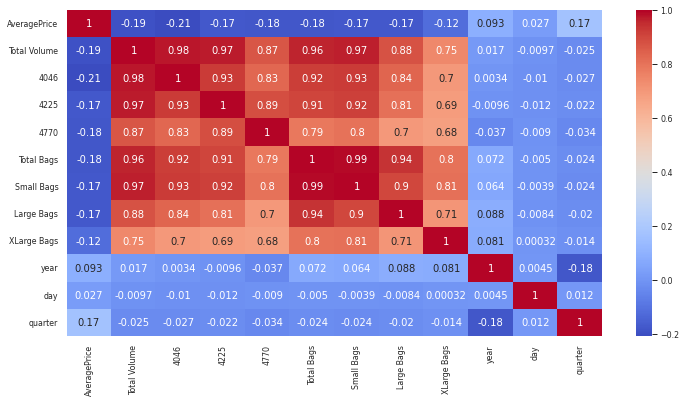

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True);

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(data.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
data.type = label.transform(data.type) 

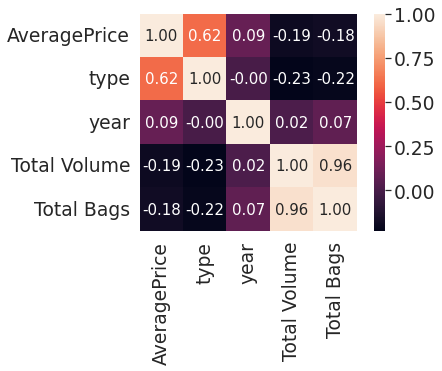

In [ ]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

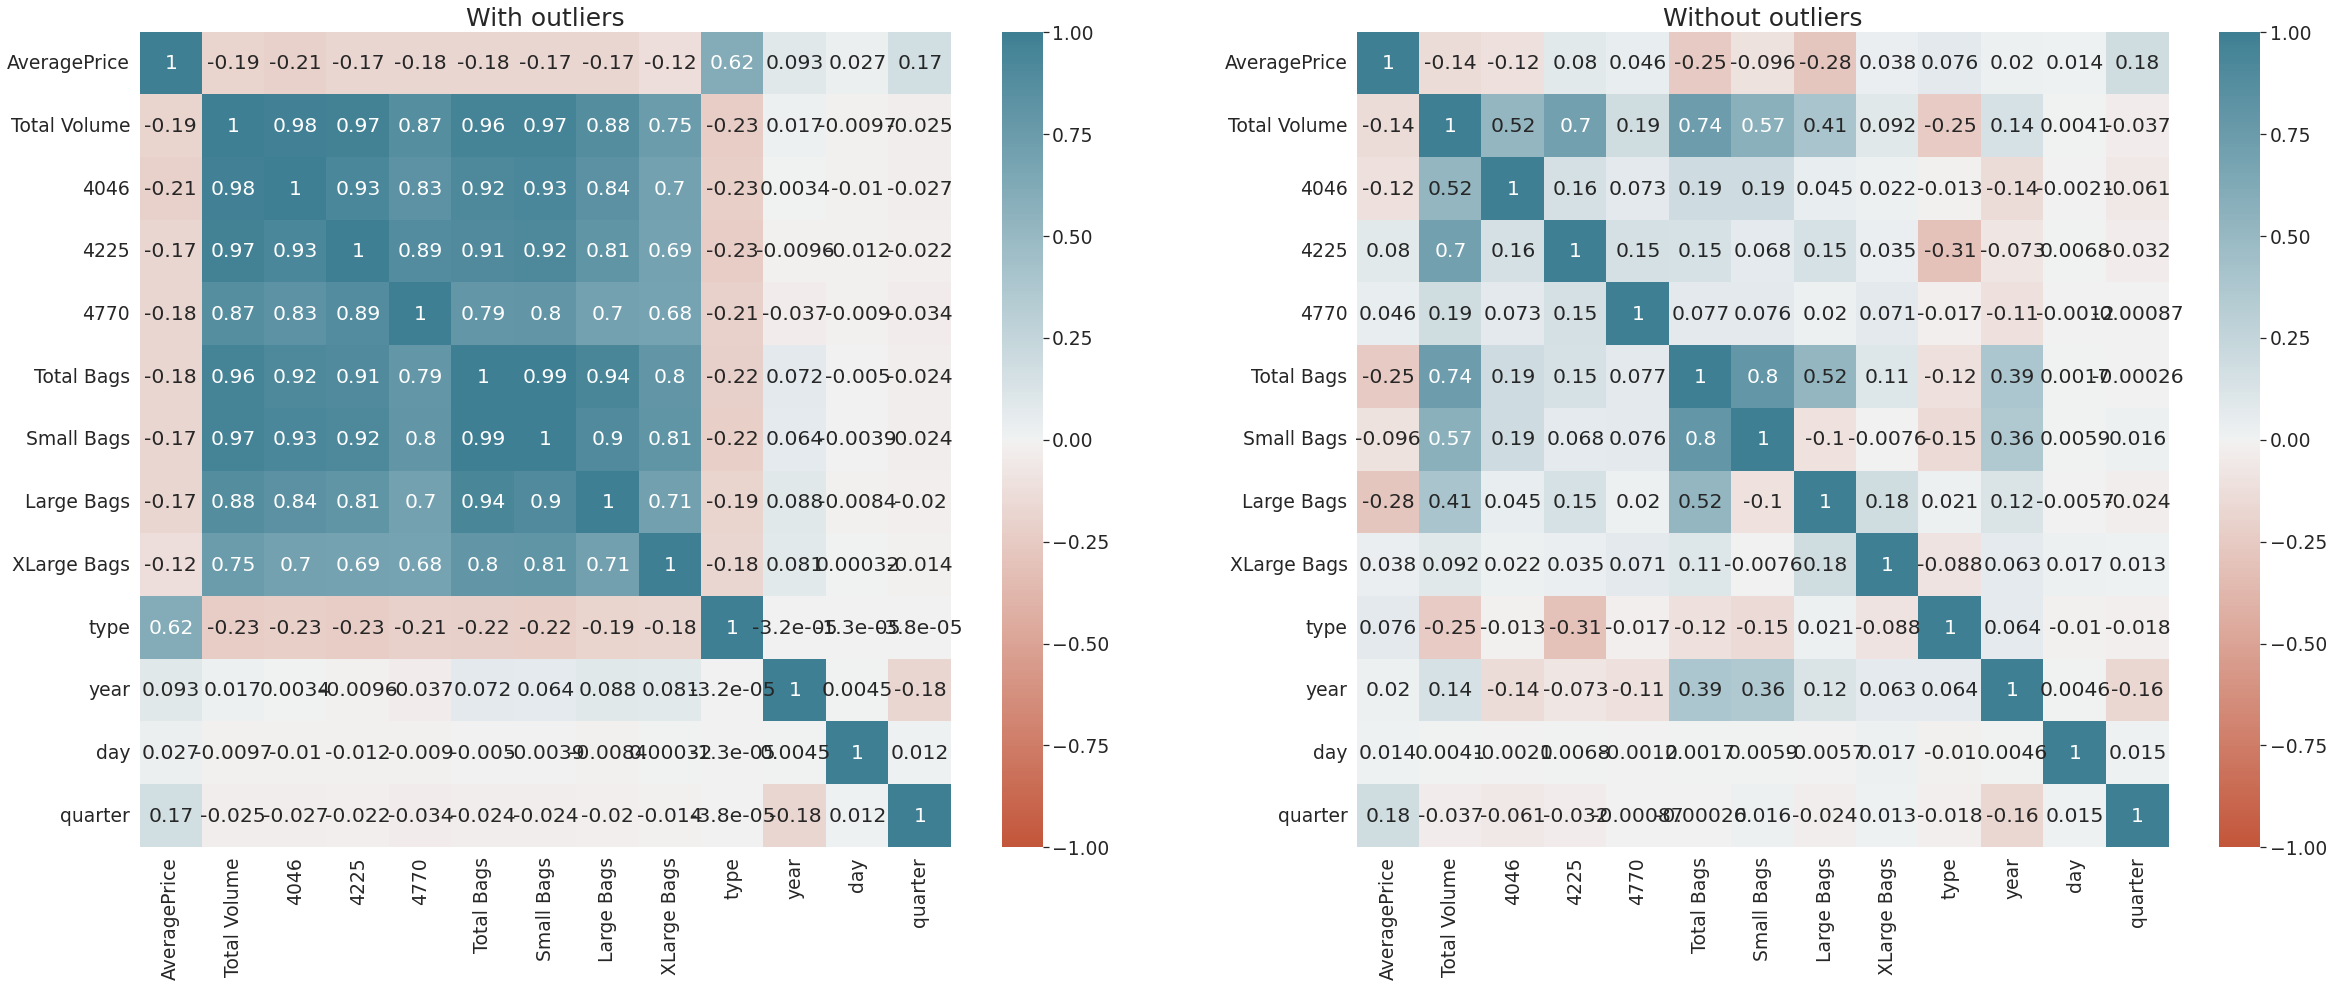

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(40,15))

data_o = data[data['Total Volume']<50000]

sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[0])
ax[0].set_title('With outliers', fontsize=25)

sns.heatmap(data_o.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[1])
ax[1].set_title('Without outliers', fontsize=25)

plt.show()

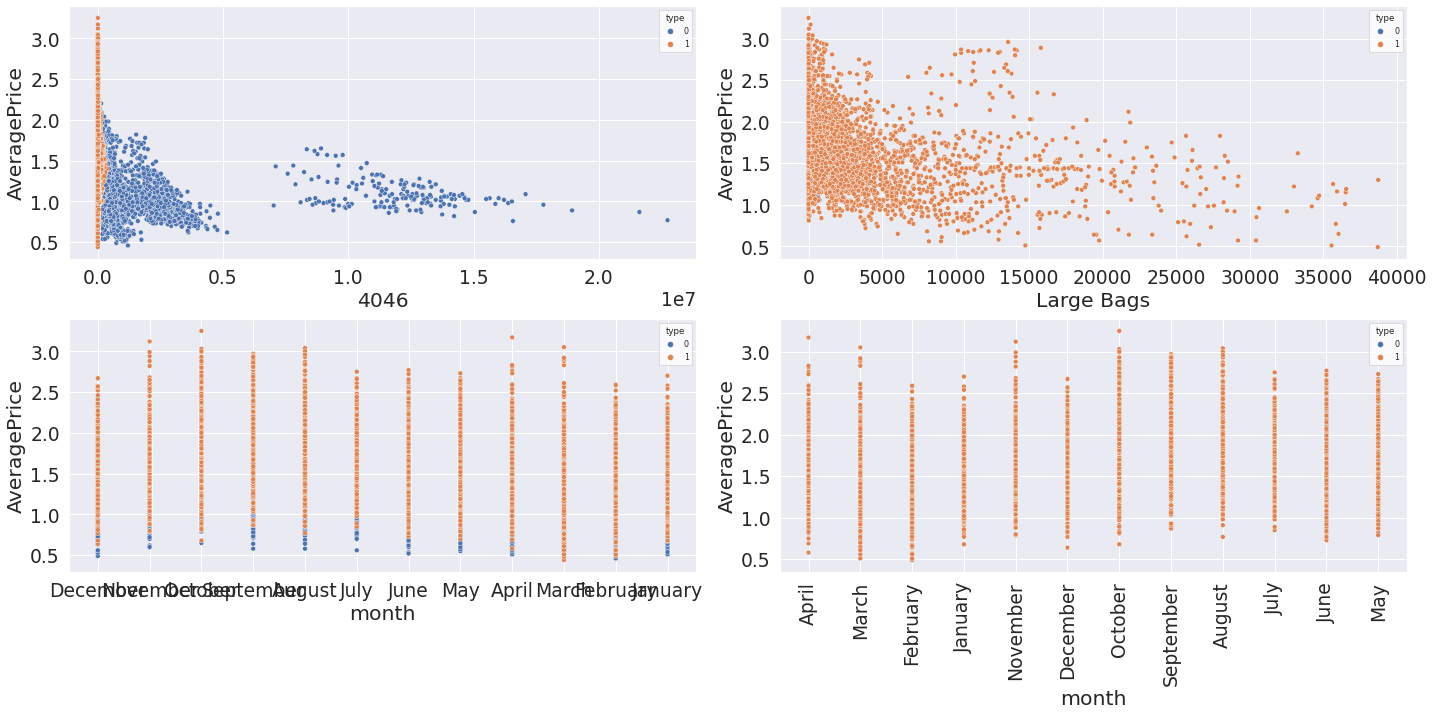

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)    
sns.scatterplot(x='4046', y='AveragePrice', data=data, hue='type', ax=ax[0,0])
sns.scatterplot(x='Large Bags', y='AveragePrice', data=data_o, hue='type', ax=ax[0,1])
sns.scatterplot(x='month', y='AveragePrice', data=data, hue='type', ax=ax[1,0])
sns.scatterplot(x='month', y='AveragePrice', data=data_o, hue='type', ax=ax[1,1])                                                                                                                                                                                                                                                                                            
plt.xticks(rotation=90)                                                               
plt.tight_layout()

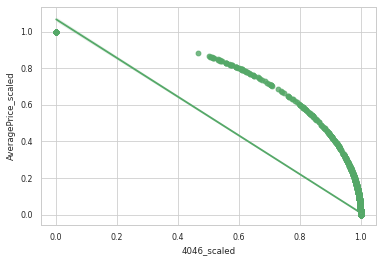

In [ ]:
scaler = Normalizer()
scaler.fit(data[['4046', 'AveragePrice']].values)
data['4046_scaled'] = scaler.transform(data[['4046', 'AveragePrice']].values)[:,0]
data['AveragePrice_scaled'] = scaler.transform(data[['4046', 'AveragePrice']].values)[:,1]

sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=data, color='g')
plt.show()

In [ ]:
X = data[['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]
Y = data['AveragePrice']
y=np.log1p(Y)

In [ ]:
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,Albany
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,Albany
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,Albany
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,Albany
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,Albany


In [ ]:
Y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

### Labeling the categorical variables

In [ ]:
X = pd.get_dummies(X, prefix=["type","region"], columns=["type","region"], drop_first = True)
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,type_1,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(X.columns)

Index(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'type_1', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       

## Split into Train and Valid set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.3, random_state = 99)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((12774, 61), (5475, 61), (12774,), (5475,))

## Model Training

### Multiple Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print("R2 of Linear Regresson:", lr.score(X_train,y_train) )
print("----- Prediction Accuracy-----")
print('MAE: ',metrics.mean_absolute_error(y_valid, lr.predict(X_valid)))
print('MSE: ',metrics.mean_squared_error(y_valid, lr.predict(X_valid)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))))

R2 of Linear Regresson: 0.5617616259882801
----- Prediction Accuracy-----
MAE:  0.20301652029791661
MSE:  0.07278245038216848
RMSE: 0.26978222769887655


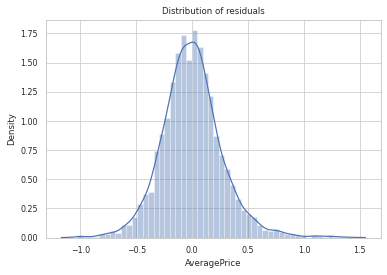

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(y_valid - lr.predict(X_valid))
plt.title('Distribution of residuals')
plt.show()

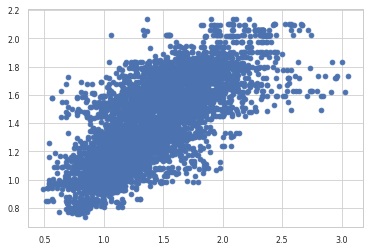

In [ ]:
plt.scatter(y_valid,lr.predict(X_valid));

## Vector Regression

In [ ]:
from sklearn.svm import SVR

### Parameter Tuning or Hyperparameter

In [ ]:
svr = SVR(kernel='rbf', C=1, gamma= 0.5)

svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))

0.9384089180056469


In [ ]:
from math import sqrt 

In [ ]:
error = sqrt(metrics.mean_squared_error(y_valid,svr.predict(X_valid))) 
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.40127249164482043


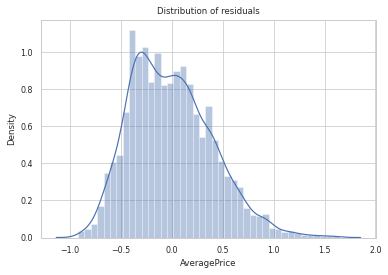

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(y_valid - svr.predict(X_valid))
plt.title('Distribution of residuals')
plt.show()

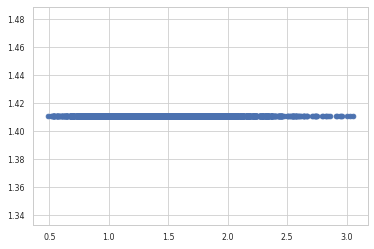

In [ ]:
plt.scatter(y_valid,svr.predict(X_valid));

In [ ]:
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))),4))

print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_valid, svr.predict(X_valid))),4))

RMSE value of the Linear Regr :  0.2698
RMSE value of the SVR Model   :  0.4013


In [ ]:
data=data.drop(['Date'], axis=1)

In [ ]:
data_dt=data

In [ ]:
data=data.drop(['year_month'], axis=1)

## Train & Validation

In [ ]:
X=datam.drop('AveragePrice',1)
y=datam['AveragePrice']

In [ ]:
print('shape of X and y respectively :',X.shape,y.shape)

shape of X and y respectively : (18249, 13) (18249,)


In [ ]:
X.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

shape of X and y respectively(train) : (14599, 13) (14599,)
shape of X and y respectively(test) : (3650, 13) (3650,)


In [ ]:
cols=X_train.columns

### Encoding

In [ ]:
scaler=LabelEncoder()

In [ ]:
for col in X_train.columns:
    if datam[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

In [ ]:
X_train.head()


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14902,2,154,1797.04,28.34,552.03,0.00,1216.67,264.39,952.28,0.00,1,2017,3
7537,13,143,362296.15,97772.92,104336.09,14152.16,146034.98,92339.30,52994.80,700.88,0,2017,36
9720,22,29,12801.03,11536.00,337.16,0.00,927.87,927.87,0.00,0.00,1,2015,11
2105,25,26,550810.62,161220.26,305122.62,17131.92,67335.82,67335.82,0.00,0.00,0,2015,40
18083,2,166,8634.75,2317.50,3561.20,0.00,2756.05,2752.63,3.42,0.00,1,2018,40


In [ ]:
X_train.shape

(14599, 13)

### Variance thresholding

In [ ]:
scaler=VarianceThreshold(0.1)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (14599, 13)
shape of X (test) : (3650, 13)


### Scaling

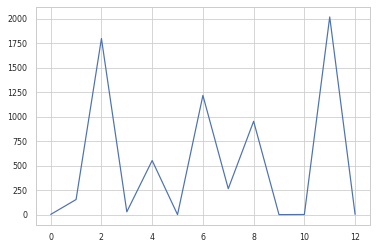

In [ ]:
plt.plot(X_train[0]);

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [ ]:
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.433439,1.432883,-0.245397,-0.230237,-0.243326,-0.214369,-0.242629,-0.245094,-0.217488,-0.177445,1.007080,0.900933,-1.505826
1,-0.725875,1.207846,-0.139340,-0.152215,-0.156342,-0.078814,-0.091821,-0.118423,0.001000,-0.136441,-0.992969,0.900933,0.611204
2,-0.146960,-1.124361,-0.242160,-0.221052,-0.243506,-0.214369,-0.242930,-0.244181,-0.221485,-0.177445,1.007080,-1.218764,-0.992607
3,0.046012,-1.185734,-0.083880,-0.101570,0.011944,-0.050273,-0.173775,-0.152821,-0.221485,-0.177445,-0.992969,-1.218764,0.867813
4,-1.433439,1.678379,-0.243386,-0.228410,-0.240804,-0.214369,-0.241026,-0.241671,-0.221471,-0.177445,1.007080,1.960781,0.867813


In [ ]:
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.369115,-0.735660,-0.244631,-0.229176,-0.242334,-0.214369,-0.242536,-0.245279,-0.216549,-0.177445,1.007080,-1.218764,-1.634131
1,0.046012,-1.185734,-0.189818,-0.226356,-0.143668,-0.085100,-0.188836,-0.203317,-0.133165,-0.107003,-0.992969,-1.218764,-0.479388
2,1.010872,-0.428790,0.061641,-0.146391,0.051818,-0.124087,0.358279,0.102441,1.144522,-0.177445,1.007080,-0.158916,1.573490
3,-0.532903,1.146472,-0.243018,-0.230010,-0.240243,-0.214369,-0.238336,-0.242477,-0.208167,-0.177445,1.007080,0.900933,-1.120912
4,-0.918847,1.514715,-0.241159,-0.229041,-0.241291,-0.207405,-0.232473,-0.230435,-0.221276,-0.177445,1.007080,1.960781,1.701795


In [ ]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


## Pipeline

In [ ]:
actr=[]
acts=[]
lstr=[]
lsts=[]

### Polynomial Regression

In [ ]:
loss=[]
val_loss=[]

In [ ]:
for i in range(2,5):
  clf=make_pipeline(PolynomialFeatures(i),LinearRegression())
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

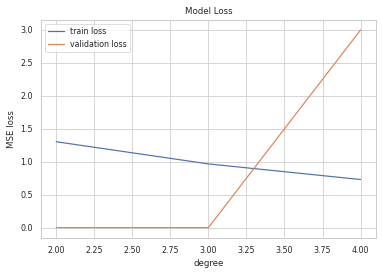

In [ ]:
plt.title('Model Loss')
plt.xlabel('degree')
plt.ylabel('MSE loss')
plt.plot(range(2,5),loss/np.mean(loss),label='train loss')
plt.plot(range(2,5),val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

In [ ]:
print('Train loss and validation loss of the polynomial function model :',loss[1],'and',val_loss[1])

Train loss and validation loss of the polynomial function model : 0.05922410042422461 and 0.09149455266129489


In [ ]:
clf=make_pipeline(PolynomialFeatures(3),LinearRegression())
clf.fit(X_train,y_train)
print('train accuracy :',clf.score(X_train,y_train))
print('test accuracy :',clf.score(X_test,y_test))

train accuracy : 0.6342411219677504
test accuracy : 0.43829281675447085


In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(loss[1])
lsts.append(val_loss[1])

### Random Forest Regression

In [ ]:
clf=RandomForestRegressor(random_state=0)

In [ ]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

In [ ]:
print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9870380537837633
test data accuracy : 0.9048055008050954
loss of train data : 0.002098813318035482
loss of test data : 0.015505904819178079


In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Ridge Regression

In [ ]:
loss=[]
val_loss=[]

In [ ]:
for i in range(1,11):
  clf=Ridge(random_state=0,alpha=i/100.0)
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

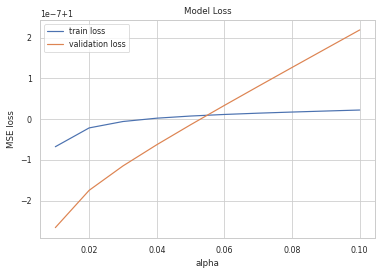

In [ ]:
plt.title('Model Loss')
plt.xlabel('alpha')
plt.ylabel('MSE loss')
plt.plot(np.arange(1,11,1)/100,loss/np.mean(loss),label='train loss')
plt.plot(np.arange(1,11,1)/100,val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

In [ ]:
clf=Ridge(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.4406070963478731
test data accuracy : 0.450490208497514
loss of train data : 0.0905775457337527
loss of test data : 0.08950776143901407


In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Lasso Regression

In [ ]:
loss=[]
val_loss=[]

In [ ]:
for i in range(1,11):
  clf=Lasso(random_state=0,alpha=i/100.0)
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

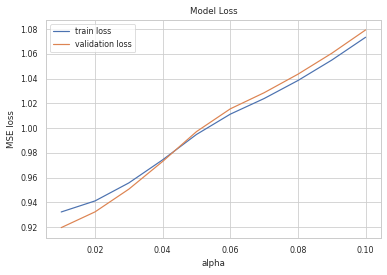

In [ ]:
plt.title('Model Loss')
plt.xlabel('alpha')
plt.ylabel('MSE loss')
plt.plot(np.arange(1,11,1)/100,loss/np.mean(loss),label='train loss')
plt.plot(np.arange(1,11,1)/100,val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

In [ ]:
clf=Lasso(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.40661768321563996
test data accuracy : 0.4186581759369319
loss of train data : 0.09608115080694615
loss of test data : 0.0946927718257464


In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

## Model Evaluation

In [ ]:
models=['Polynomial','Random Forest','Ridge','Lasso','Bayesian Ridge']

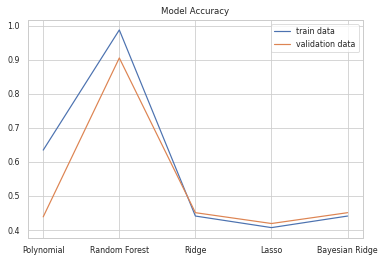

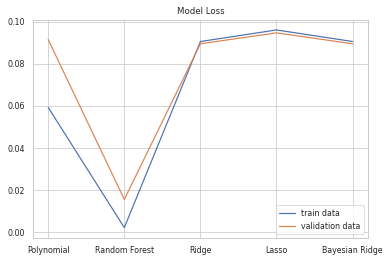

In [ ]:
plt.title('Model Accuracy')
plt.plot(models,actr,label='train data')
plt.plot(models,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(models,lstr,label='train data')
plt.plot(models,lsts,label='validation data')
plt.legend()
plt.show()